In [78]:
import pandas as pd 
pd.set_option('display.max_columns', 600)
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

In [79]:
df = pd.read_csv("/Users/jsc/Documents/Personal/Dev/ML Projects/Realestate Price Estimator/melb_data.csv")

# Loading Data

In [80]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [82]:
# For ease of analysis, we will drop the columns that have missing values 
# (may come back to this later on)
del df['BuildingArea']
del df['YearBuilt']
del df['CouncilArea']
del df['Bedroom2']
del df['Address']

In [83]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13518 entries, 0 to 13579
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13518 non-null  object 
 1   Rooms          13518 non-null  int64  
 2   Type           13518 non-null  object 
 3   Price          13518 non-null  float64
 4   Method         13518 non-null  object 
 5   SellerG        13518 non-null  object 
 6   Date           13518 non-null  object 
 7   Distance       13518 non-null  float64
 8   Postcode       13518 non-null  float64
 9   Bathroom       13518 non-null  float64
 10  Car            13518 non-null  float64
 11  Landsize       13518 non-null  float64
 12  Lattitude      13518 non-null  float64
 13  Longtitude     13518 non-null  float64
 14  Regionname     13518 non-null  object 
 15  Propertycount  13518 non-null  float64
dtypes: float64(9), int64(1), object(6)
memory usage: 1.8+ MB


# Data Exploration

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Distance'}>],
       [<Axes: title={'center': 'Postcode'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>],
       [<Axes: title={'center': 'Landsize'}>,
        <Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longtitude'}>],
       [<Axes: title={'center': 'Propertycount'}>, <Axes: >, <Axes: >]],
      dtype=object)

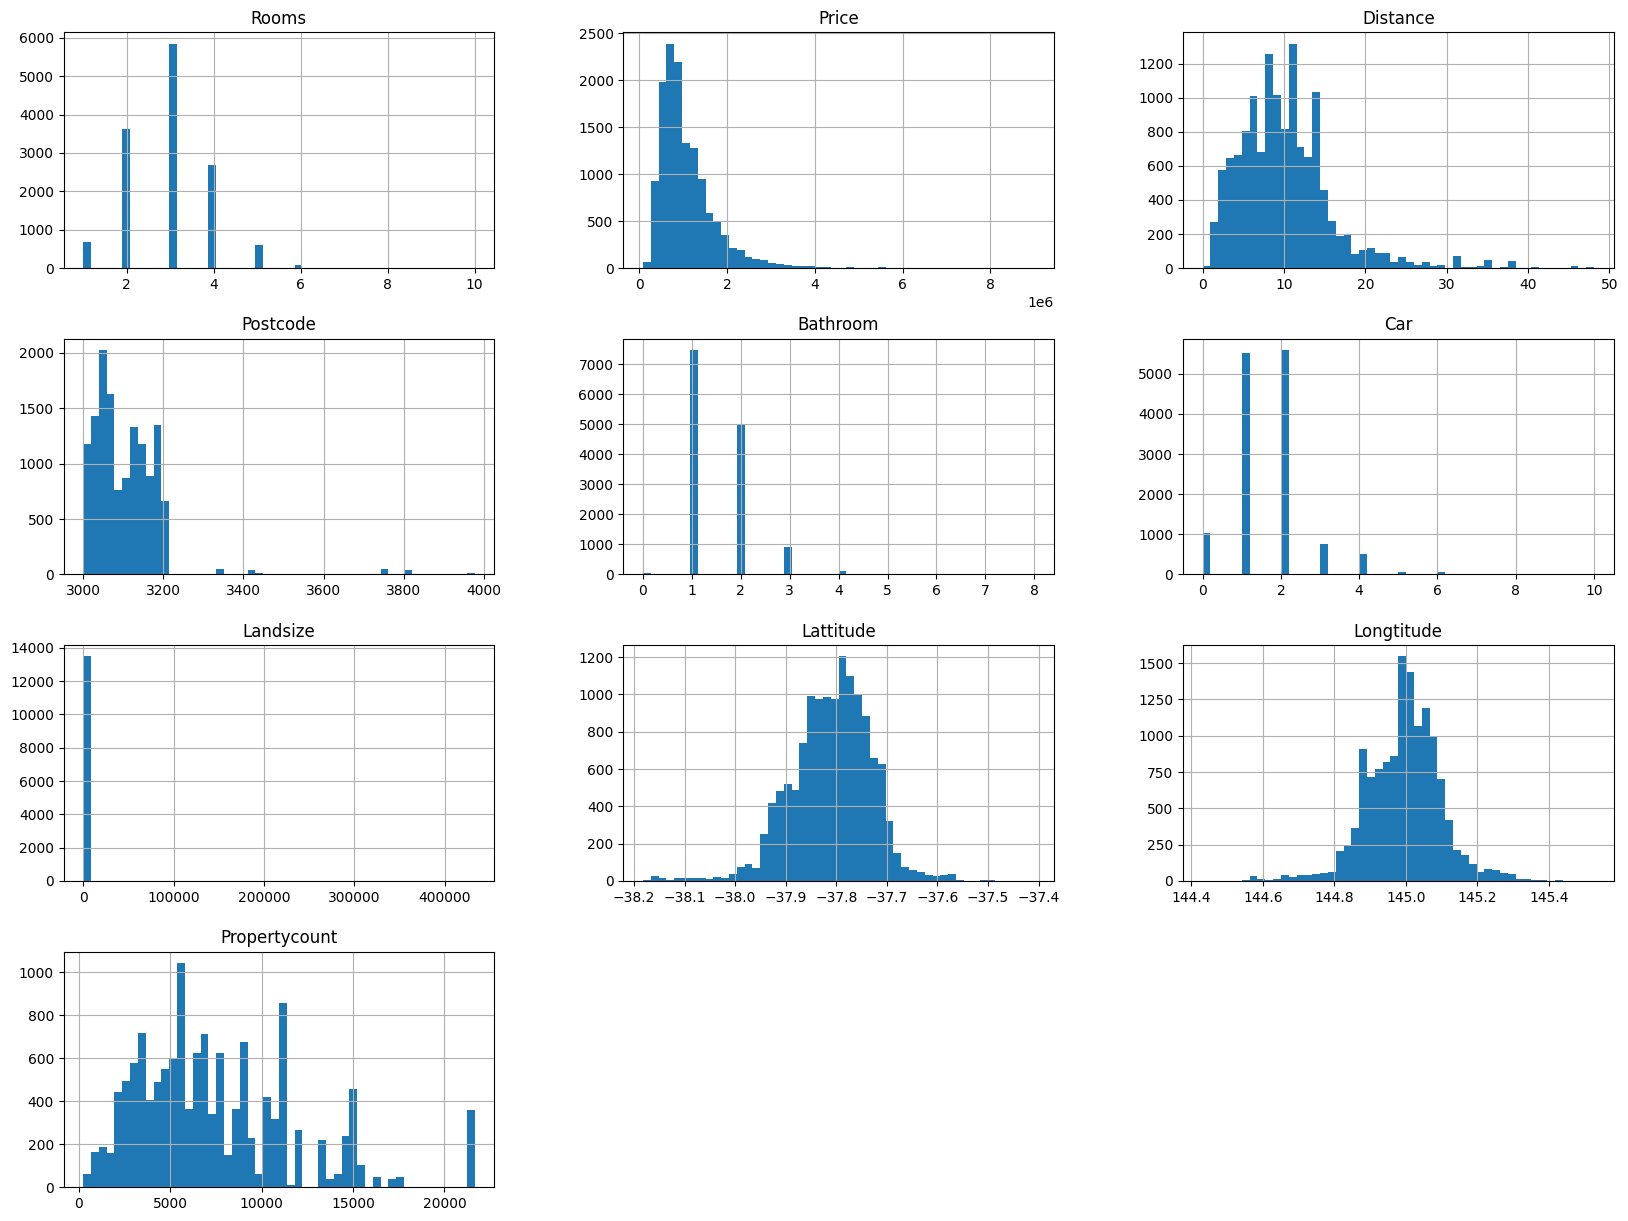

In [84]:
df.hist(bins=50, figsize=(20,15))

# Data Preprocessing

In [85]:
df['Landsize'] = np.log(train_data['Landsize']+1)
df['Postcode'] = np.log(train_data['Postcode']+1)


array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Distance'}>],
       [<Axes: title={'center': 'Postcode'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>],
       [<Axes: title={'center': 'Landsize'}>,
        <Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longtitude'}>],
       [<Axes: title={'center': 'Propertycount'}>, <Axes: >, <Axes: >]],
      dtype=object)

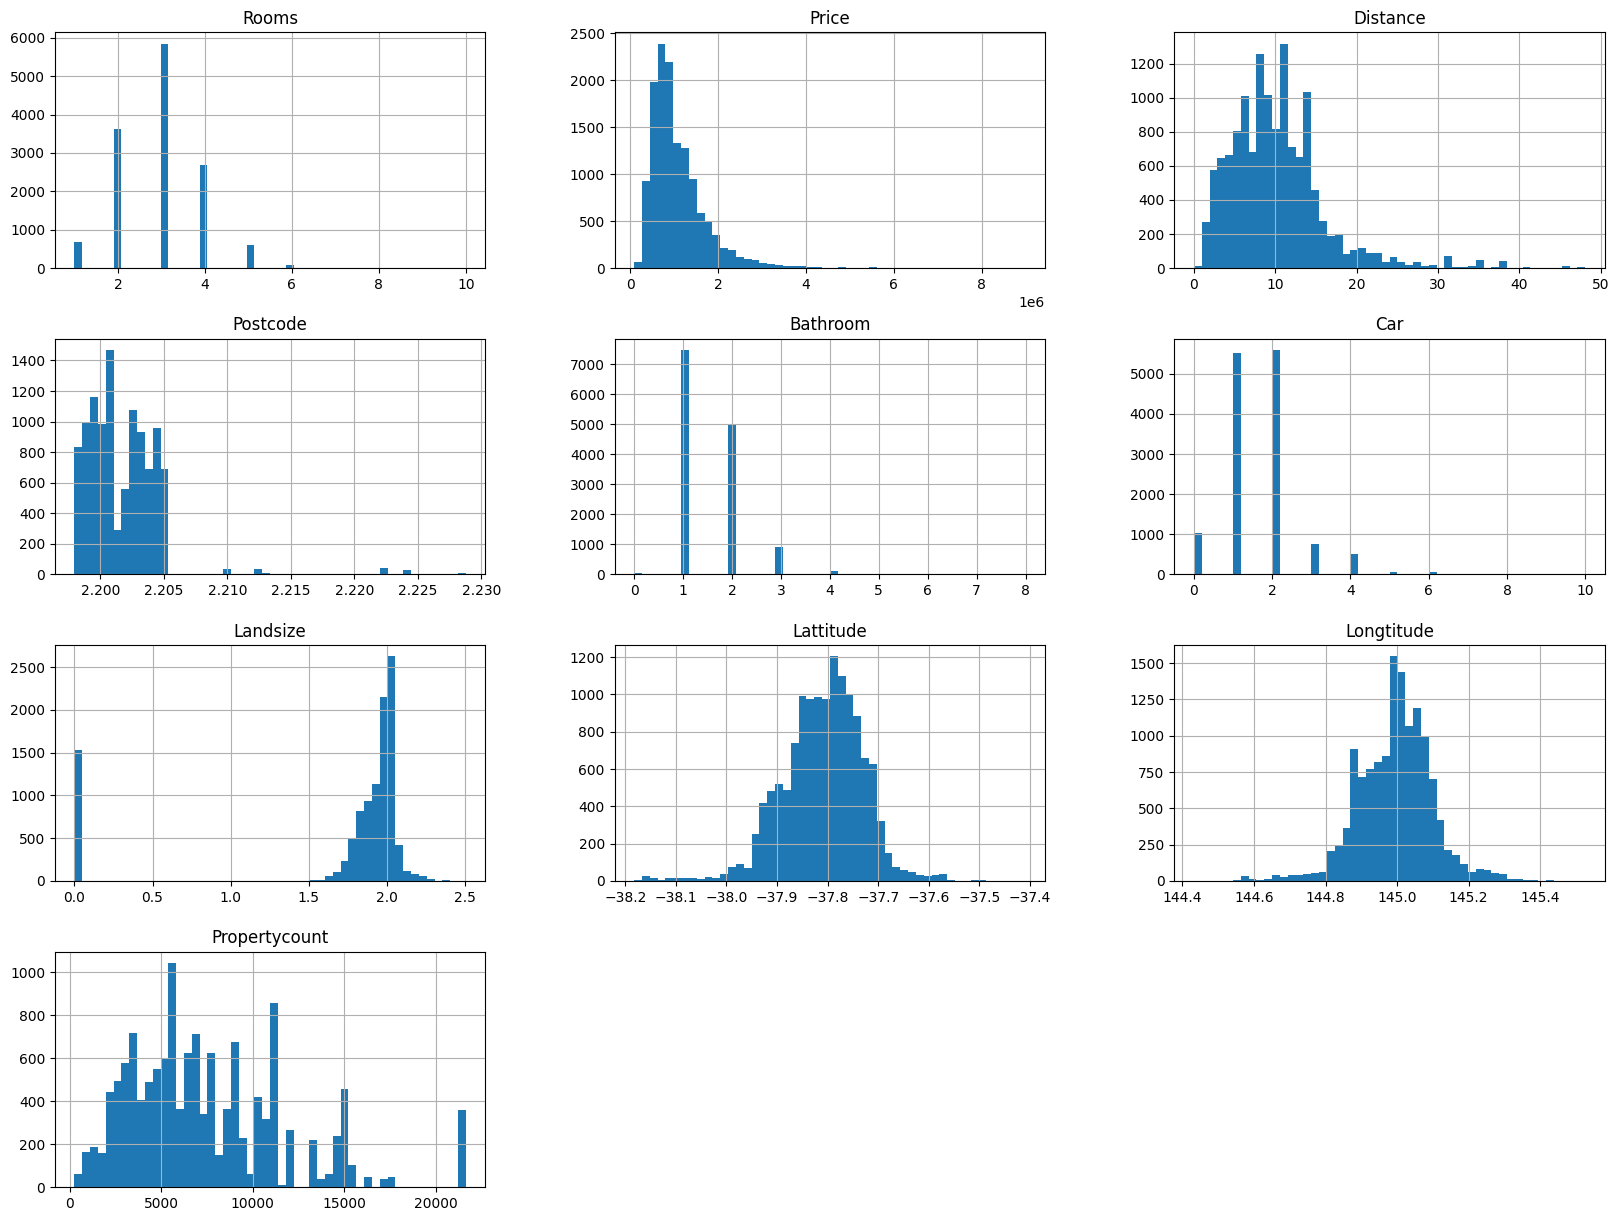

In [86]:
df.hist(bins=50, figsize=(20,15))

One hot encoding for categorical data

In [87]:
import category_encoders as ce
ce_OHE = ce.OneHotEncoder(cols=['Suburb','Type', 'Method', 'SellerG', 'Regionname'])
df = ce_OHE.fit_transform(df)
df


,Suburb_1,Suburb_2,Suburb_3,Suburb_4,Suburb_5,Suburb_6,Suburb_7,Suburb_8,Suburb_9,Suburb_10,Suburb_11,Suburb_12,Suburb_13,Suburb_14,Suburb_15,Suburb_16,Suburb_17,Suburb_18,Suburb_19,Suburb_20,Suburb_21,Suburb_22,Suburb_23,Suburb_24,Suburb_25,Suburb_26,Suburb_27,Suburb_28,Suburb_29,Suburb_30,Suburb_31,Suburb_32,Suburb_33,Suburb_34,Suburb_35,Suburb_36,Suburb_37,Suburb_38,Suburb_39,Suburb_40,Suburb_41,Suburb_42,Suburb_43,Suburb_44,Suburb_45,Suburb_46,Suburb_47,Suburb_48,Suburb_49,Suburb_50,Suburb_51,Suburb_52,Suburb_53,Suburb_54,Suburb_55,Suburb_56,Suburb_57,Suburb_58,Suburb_59,Suburb_60,Suburb_61,Suburb_62,Suburb_63,Suburb_64,Suburb_65,Suburb_66,Suburb_67,Suburb_68,Suburb_69,Suburb_70,Suburb_71,Suburb_72,Suburb_73,Suburb_74,Suburb_75,Suburb_76,Suburb_77,Suburb_78,Suburb_79,Suburb_80,Suburb_81,Suburb_82,Suburb_83,Suburb_84,Suburb_85,Suburb_86,Suburb_87,Suburb_88,Suburb_89,Suburb_90,Suburb_91,Suburb_92,Suburb_93,Suburb_94,Suburb_95,Suburb_96,Suburb_97,Suburb_98,Suburb_99,Suburb_100,Suburb_101,Suburb_102,Suburb_103,Suburb_104,Suburb_105,Suburb_106,Suburb_107,Suburb_108,Suburb_109,Suburb_110,Suburb_111,Suburb_112,Suburb_113,Suburb_114,Suburb_115,Suburb_116,Suburb_117,Suburb_118,Suburb_119,Suburb_120,Suburb_121,Suburb_122,Suburb_123,Suburb_124,Suburb_125,Suburb_126,Suburb_127,Suburb_128,Suburb_129,Suburb_130,Suburb_131,Suburb_132,Suburb_133,Suburb_134,Suburb_135,Suburb_136,Suburb_137,Suburb_138,Suburb_139,Suburb_140,Suburb_141,Suburb_142,Suburb_143,Suburb_144,Suburb_145,Suburb_146,Suburb_147,Suburb_148,Suburb_149,Suburb_150,Suburb_151,Suburb_152,Suburb_153,Suburb_154,Suburb_155,Suburb_156,Suburb_157,Suburb_158,Suburb_159,Suburb_160,Suburb_161,Suburb_162,Suburb_163,Suburb_164,Suburb_165,Suburb_166,Suburb_167,Suburb_168,Suburb_169,Suburb_170,Suburb_171,Suburb_172,Suburb_173,Suburb_174,Suburb_175,Suburb_176,Suburb_177,Suburb_178,Suburb_179,Suburb_180,Suburb_181,Suburb_182,Suburb_183,Suburb_184,Suburb_185,Suburb_186,Suburb_187,Suburb_188,Suburb_189,Suburb_190,Suburb_191,Suburb_192,Suburb_193,Suburb_194,Suburb_195,Suburb_196,Suburb_197,Suburb_198,Suburb_199,Suburb_200,Suburb_201,Suburb_202,Suburb_203,Suburb_204,Suburb_205,Suburb_206,Suburb_207,Suburb_208,Suburb_209,Suburb_210,Suburb_211,Suburb_212,Suburb_213,Suburb_214,Suburb_215,Suburb_216,Suburb_217,Suburb_218,Suburb_219,Suburb_220,Suburb_221,Suburb_222,Suburb_223,Suburb_224,Suburb_225,Suburb_226,Suburb_227,Suburb_228,Suburb_229,Suburb_230,Suburb_231,Suburb_232,Suburb_233,Suburb_234,Suburb_235,Suburb_236,Suburb_237,Suburb_238,Suburb_239,Suburb_240,Suburb_241,Suburb_242,Suburb_243,Suburb_244,Suburb_245,Suburb_246,Suburb_247,Suburb_248,Suburb_249,Suburb_250,Suburb_251,Suburb_252,Suburb_253,Suburb_254,Suburb_255,Suburb_256,Suburb_257,Suburb_258,Suburb_259,Suburb_260,Suburb_261,Suburb_262,Suburb_263,Suburb_264,Suburb_265,Suburb_266,Suburb_267,Suburb_268,Suburb_269,Suburb_270,Suburb_271,Suburb_272,Suburb_273,Suburb_274,Suburb_275,Suburb_276,Suburb_277,Suburb_278,Suburb_279,Suburb_280,Suburb_281,Suburb_282,Suburb_283,Suburb_284,Suburb_285,Suburb_286,Suburb_287,Suburb_288,Suburb_289,Suburb_290,Suburb_291,Suburb_292,Suburb_293,Suburb_294,Suburb_295,Suburb_296,Suburb_297,Suburb_298,Suburb_299,Suburb_300,...,Suburb_310,Suburb_311,Suburb_312,Suburb_313,Suburb_314,Rooms,Type_1,Type_2,Type_3,Price,Method_1,Method_2,Method_3,Method_4,Method_5,SellerG_1,SellerG_2,SellerG_3,SellerG_4,SellerG_5,SellerG_6,SellerG_7,SellerG_8,SellerG_9,SellerG_10,SellerG_11,SellerG_12,SellerG_13,SellerG_14,SellerG_15,SellerG_16,SellerG_17,SellerG_18,SellerG_19,SellerG_20,SellerG_21,SellerG_22,SellerG_23,SellerG_24,SellerG_25,SellerG_26,SellerG_27,SellerG_28,SellerG_29,SellerG_30,SellerG_31,SellerG_32,SellerG_33,SellerG_34,SellerG_35,SellerG_36,SellerG_37,SellerG_38,SellerG_39,SellerG_40,SellerG_41,SellerG_42,SellerG_43,SellerG_44,SellerG_45,SellerG_46,SellerG_47,SellerG_48,SellerG_49,SellerG_50,SellerG_51,SellerG_52,SellerG_53,SellerG_54,SellerG_55,SellerG_56,SellerG_57,SellerG_58,SellerG_59,SellerG_60,SellerG_61,SellerG_

!! Note while this strategy fixes categoies it increases columns drastically. This is needed for an algo like linear regression. BUT should try different algo like XGBoost which can handle categories natively.

In [88]:
# Now to handle dates I shall split up date column into 3 different columns(Year, Month, Day)

df['Year'] = pd.to_datetime(df['Date'],dayfirst=True).dt.year
df['Month'] = pd.to_datetime(df['Date'],dayfirst=True).dt.month
df['Day'] = pd.to_datetime(df['Date'],dayfirst=True).dt.day


In [89]:
df.drop('Date', axis=1, inplace=True)

In [90]:
df.corr()

,Suburb_1,Suburb_2,Suburb_3,Suburb_4,Suburb_5,Suburb_6,Suburb_7,Suburb_8,Suburb_9,Suburb_10,Suburb_11,Suburb_12,Suburb_13,Suburb_14,Suburb_15,Suburb_16,Suburb_17,Suburb_18,Suburb_19,Suburb_20,Suburb_21,Suburb_22,Suburb_23,Suburb_24,Suburb_25,Suburb_26,Suburb_27,Suburb_28,Suburb_29,Suburb_30,Suburb_31,Suburb_32,Suburb_33,Suburb_34,Suburb_35,Suburb_36,Suburb_37,Suburb_38,Suburb_39,Suburb_40,Suburb_41,Suburb_42,Suburb_43,Suburb_44,Suburb_45,Suburb_46,Suburb_47,Suburb_48,Suburb_49,Suburb_50,Suburb_51,Suburb_52,Suburb_53,Suburb_54,Suburb_55,Suburb_56,Suburb_57,Suburb_58,Suburb_59,Suburb_60,Suburb_61,Suburb_62,Suburb_63,Suburb_64,Suburb_65,Suburb_66,Suburb_67,Suburb_68,Suburb_69,Suburb_70,Suburb_71,Suburb_72,Suburb_73,Suburb_74,Suburb_75,Suburb_76,Suburb_77,Suburb_78,Suburb_79,Suburb_80,Suburb_81,Suburb_82,Suburb_83,Suburb_84,Suburb_85,Suburb_86,Suburb_87,Suburb_88,Suburb_89,Suburb_90,Suburb_91,Suburb_92,Suburb_93,Suburb_94,Suburb_95,Suburb_96,Suburb_97,Suburb_98,Suburb_99,Suburb_100,Suburb_101,Suburb_102,Suburb_103,Suburb_104,Suburb_105,Suburb_106,Suburb_107,Suburb_108,Suburb_109,Suburb_110,Suburb_111,Suburb_112,Suburb_113,Suburb_114,Suburb_115,Suburb_116,Suburb_117,Suburb_118,Suburb_119,Suburb_120,Suburb_121,Suburb_122,Suburb_123,Suburb_124,Suburb_125,Suburb_126,Suburb_127,Suburb_128,Suburb_129,Suburb_130,Suburb_131,Suburb_132,Suburb_133,Suburb_134,Suburb_135,Suburb_136,Suburb_137,Suburb_138,Suburb_139,Suburb_140,Suburb_141,Suburb_142,Suburb_143,Suburb_144,Suburb_145,Suburb_146,Suburb_147,Suburb_148,Suburb_149,Suburb_150,Suburb_151,Suburb_152,Suburb_153,Suburb_154,Suburb_155,Suburb_156,Suburb_157,Suburb_158,Suburb_159,Suburb_160,Suburb_161,Suburb_162,Suburb_163,Suburb_164,Suburb_165,Suburb_166,Suburb_167,Suburb_168,Suburb_169,Suburb_170,Suburb_171,Suburb_172,Suburb_173,Suburb_174,Suburb_175,Suburb_176,Suburb_177,Suburb_178,Suburb_179,Suburb_180,Suburb_181,Suburb_182,Suburb_183,Suburb_184,Suburb_185,Suburb_186,Suburb_187,Suburb_188,Suburb_189,Suburb_190,Suburb_191,Suburb_192,Suburb_193,Suburb_194,Suburb_195,Suburb_196,Suburb_197,Suburb_198,Suburb_199,Suburb_200,Suburb_201,Suburb_202,Suburb_203,Suburb_204,Suburb_205,Suburb_206,Suburb_207,Suburb_208,Suburb_209,Suburb_210,Suburb_211,Suburb_212,Suburb_213,Suburb_214,Suburb_215,Suburb_216,Suburb_217,Suburb_218,Suburb_219,Suburb_220,Suburb_221,Suburb_222,Suburb_223,Suburb_224,Suburb_225,Suburb_226,Suburb_227,Suburb_228,Suburb_229,Suburb_230,Suburb_231,Suburb_232,Suburb_233,Suburb_234,Suburb_235,Suburb_236,Suburb_237,Suburb_238,Suburb_239,Suburb_240,Suburb_241,Suburb_242,Suburb_243,Suburb_244,Suburb_245,Suburb_246,Suburb_247,Suburb_248,Suburb_249,Suburb_250,Suburb_251,Suburb_252,Suburb_253,Suburb_254,Suburb_255,Suburb_256,Suburb_257,Suburb_258,Suburb_259,Suburb_260,Suburb_261,Suburb_262,Suburb_263,Suburb_264,Suburb_265,Suburb_266,Suburb_267,Suburb_268,Suburb_269,Suburb_270,Suburb_271,Suburb_272,Suburb_273,Suburb_274,Suburb_275,Suburb_276,Suburb_277,Suburb_278,Suburb_279,Suburb_280,Suburb_281,Suburb_282,Suburb_283,Suburb_284,Suburb_285,Suburb_286,Suburb_287,Suburb_288,Suburb_289,Suburb_290,Suburb_291,Suburb_292,Suburb_293,Suburb_294,Suburb_295,Suburb_296,Suburb_297,Suburb_298,Suburb_299,Suburb_300,...,Suburb_312,Suburb_313,Suburb_314,Rooms,Type_1,Type_2,Type_3,Price,Method_1,Method_2,Method_3,Method_4,Method_5,SellerG_1,SellerG_2,SellerG_3,SellerG_4,SellerG_5,SellerG_6,SellerG_7,SellerG_8,SellerG_9,SellerG_10,SellerG_11,SellerG_12,SellerG_13,SellerG_14,SellerG_15,SellerG_16,SellerG_17,SellerG_18,SellerG_19,SellerG_20,SellerG_21,SellerG_22,SellerG_23,SellerG_24,SellerG_25,SellerG_26,SellerG_27,SellerG_28,SellerG_29,SellerG_30,SellerG_31,SellerG_32,SellerG_33,SellerG_34,SellerG_35,SellerG_36,SellerG_37,SellerG_38,SellerG_39,SellerG_40,SellerG_41,SellerG_42,SellerG_43,SellerG_44,SellerG_45,SellerG_46,SellerG_47,SellerG_48,SellerG_49,SellerG_50,SellerG_51,SellerG_52,SellerG_53,SellerG_54,SellerG_55,SellerG_56,SellerG_57,SellerG_58,SellerG_59,SellerG_60,SellerG_61,SellerG_62,SellerG_63,SellerG_

# Building model

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13518 entries, 0 to 13579
Columns: 611 entries, Suburb_1 to Day
dtypes: float64(9), int32(3), int64(599)
memory usage: 63.0 MB


In [137]:
from sklearn.model_selection import train_test_split
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

X_train, y_train = df.drop('Price', axis=1), df['Price']
X_test, y_test = df.drop('Price', axis=1), df['Price']

In [140]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [141]:
forest.score(X_test, y_test)

0.9676208454181245